In [1]:
from epyc import JSONLabNotebook
import epyc
import epydemic
import numpy as np
from epydemic import SEIR, SIR, ERNetwork, Monitor, ProcessSequence
import pandas as pd
import matplotlib.pyplot as plt
from parameters import *
from scipy.stats import ks_2samp
from matplotlib.gridspec import SubplotSpec
import string
plt.rcParams.update({'font.size': 13})

In [2]:
json_lab = JSONLabNotebook(get_out_path('ex_1_sirq'), create=False)

In [3]:
dfs = [json_lab.dataframe(tag=rs) for rs in json_lab.resultSets()]
df = pd.concat(dfs)

In [4]:
label_fontsize = 16

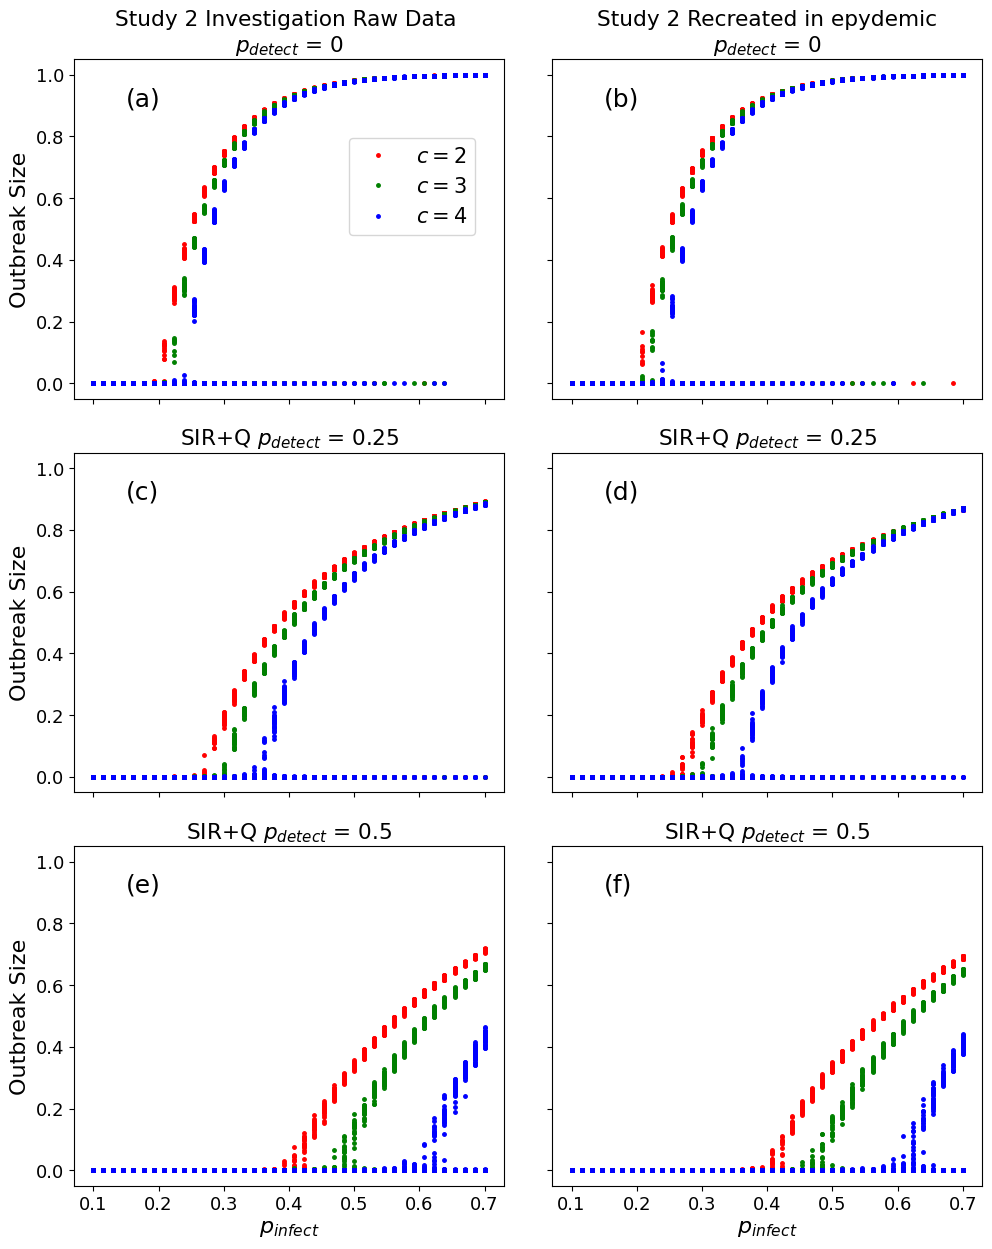

In [5]:
fig, axs = plt.subplots(3,2,  sharex=True, sharey=True, figsize=(10,12))
fig.tight_layout(h_pad=2)

colours = ["r.", "g.", "b."]
labels = string.ascii_lowercase

for i, pD in enumerate(p_detect):
    expected_data_raw = np.load('limerick-data/' + str(n_RC) + "_" + str(pD) +'_unprocessed_fig3A.npy')

    axs[i][0].set_title("SIR+Q $p_{detect}$ = " + str(pD))
    axs[i][1].set_title("SIR+Q $p_{detect}$ = " + str(pD))

    axs[i][0].text(0.15, 0.9, f"({labels[i*2]})", fontsize=18)
    axs[i][1].text(0.15, 0.9, f"({labels[i*2+1]})", fontsize=18)  

    for j, c in enumerate(c_sizes_RC) :
        ob = df.loc[(df["cSize"] == c) & (df["pDetect"] == pD)]
        ex = list(zip(*np.array(expected_data_raw[j])))
     
        axs[i][0].plot(p_infects, ex, colours[j], markersize=5)
        axs[i][1].plot(ob[SIR.P_INFECT],  (ob[SIR.REMOVED] + (ob["epydemic.sir.Q"] * ob[SIR.P_INFECT])) / n_RC , colours[j], label=f'$c = {c}$', markersize=5)
    
    axs[i][0].set_ylabel('Outbreak Size', fontsize=label_fontsize)



axs[0][0].title.set_text("Study 2 Investigation Raw Data \n$p_{detect}$ = 0")
axs[0][1].title.set_text("Study 2 Recreated in epydemic\n$p_{detect}$ = 0")
axs[2][0].set_xlabel("$p_{infect}$", fontsize=label_fontsize)
axs[2][1].set_xlabel("$p_{infect}$", fontsize=label_fontsize)
axs[0][1].legend(loc='upper center', bbox_to_anchor=(-0.325, 0.8,), fontsize=15)
plt.show()